In [2]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import glob
import torch
import pickle
import zipfile
from IPython.display import display
from IPython.display import Image as IPImage
import os
from tqdm.autonotebook import tqdm
torch.set_num_threads(4)


# First, we load the respective CLIP model
model = SentenceTransformer('clip-ViT-B-32')

/Users/mhendriksen/Desktop/repositories/evaluating-cmr-in-mm/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [1]:
import sys

PROJECT_PATH = '/Users/mhendriksen/Desktop/repositories/evaluating-cmr-in-mm/'

sys.path.append(PROJECT_PATH)

In [5]:
from src.perturbations.perturbation_types.synonym_based import SynonymBased 

perturbation = SynonymBased()

In [22]:
from nltk.tokenize import word_tokenize
import nltk

caption = 'nice boy and nice boy'

nltk.pos_tag(word_tokenize(caption))

[('nice', 'JJ'), ('boy', 'NN'), ('and', 'CC'), ('nice', 'JJ'), ('boy', 'NN')]

In [23]:
perturbation.replace_adj_with_synonyms(caption)

'decent boy and nice boy'

In [27]:
perturbation.get_synonyms('pierced')

['pierce', 'thrust', 'perforated', 'perforate', 'punctured']

In [12]:
# load images
emb_filename = '/Users/mhendriksen/Desktop/repositories/evaluating-cmr-in-mm/f30k-img-embeddings.pkl'

with open(emb_filename, 'rb') as f:
    data = pickle.load(f)

In [4]:

def search(query, img_names, img_emb, k=3):
    img_folder = '/Users/mhendriksen/Desktop/repositories/datasets/f30k/flickr30k-images'

    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]
    
    print("Query:")
    display(query)
    for hit in hits:
        print(img_names[hit['corpus_id']])
        display(IPImage(os.path.join(img_folder, img_names[hit['corpus_id']]), width=200))

In [47]:
statement = 'and true it true'

query.strip('.') + statement + '.'

'The man with pierced ears is wearing glasses and an orange hatand true it true.'

In [46]:
query.strip('.')

'The man with pierced ears is wearing glasses and an orange hat'

Query:


'The man with pierced ears is wearing glasses and an orange hat.'

1429714512.jpg


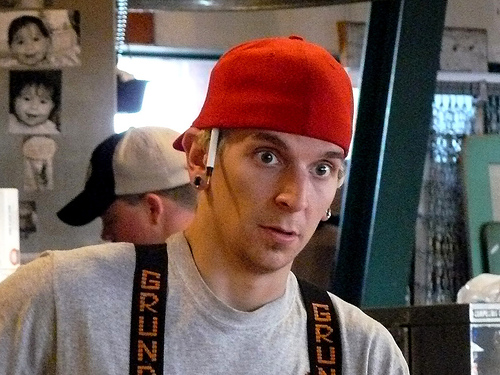

1528205014.jpg


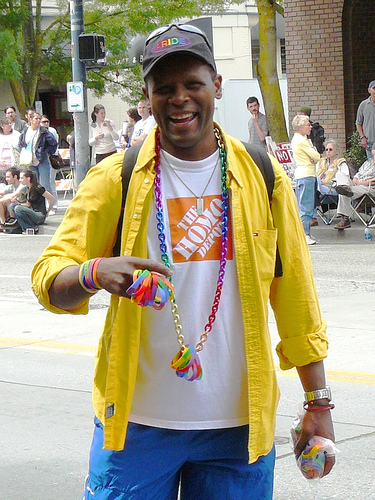

139818748.jpg


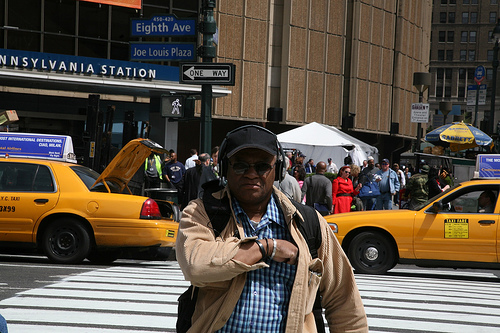

In [35]:


search(
    query=query,
    img_names=data[0],
    img_emb=data[1],
    k=3
)

In [33]:
query

'The guy with pierced ears is wearing glasses and an orange hat and true it true.'

Query:


'The guy with pierced ears is wearing glasses and an orange hat and true it true.'

4978377853.jpg


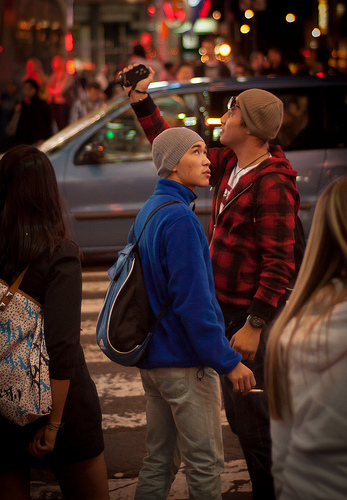

1045124251.jpg


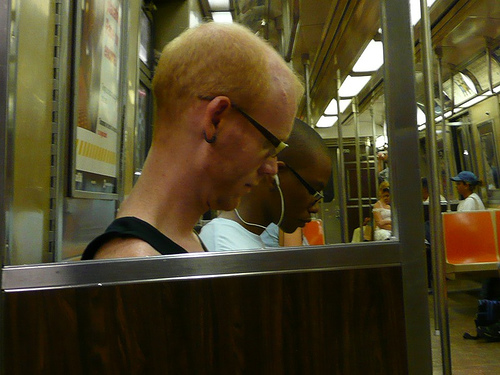

2120571547.jpg


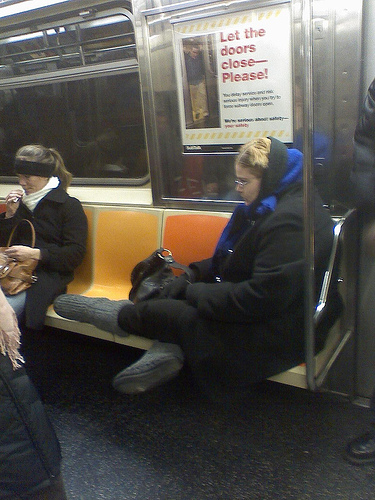

In [32]:
query = 'The guy with pierced ears is wearing glasses and an orange hat and true it true.'

search(
    query=query,
    img_names=data[0],
    img_emb=data[1],
    k=3
)